In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv(r"C:\Users\ADMIN\Desktop\Machine Learning\machine learning\datasets\Housing.csv")

In [44]:
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [45]:
df = df.drop(["bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"],axis="columns")

df.sample(10)

In [46]:
from sklearn import preprocessing

In [47]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

.values converts the price column in dataframe into 1-D numpy array and reshape converts it into 
2-D array (df.shape[0],1) specifies that the there should be 0 row and 1 column in the output
dataframe

In [48]:
Scaled_x = sx.fit_transform(df.drop('price',axis="columns"))
Scaled_y = sy.fit_transform(df["price"].values.reshape(df.shape[0],1))

In [49]:
Scaled_x

array([[0.39656357, 0.6       ],
       [0.5024055 , 0.6       ],
       [0.57113402, 0.4       ],
       ...,
       [0.13539519, 0.2       ],
       [0.08659794, 0.4       ],
       [0.15120275, 0.4       ]])

In [50]:
Scaled_x.T

array([[0.39656357, 0.5024055 , 0.57113402, ..., 0.13539519, 0.08659794,
        0.15120275],
       [0.6       , 0.6       , 0.4       , ..., 0.2       , 0.4       ,
        0.4       ]])

In [51]:
Scaled_y

array([[1.        ],
       [0.90909091],
       [0.90909091],
       [0.90606061],
       [0.83636364],
       [0.78787879],
       [0.72727273],
       [0.72727273],
       [0.7030303 ],
       [0.6969697 ],
       [0.6969697 ],
       [0.68666667],
       [0.65454545],
       [0.64848485],
       [0.64848485],
       [0.63636364],
       [0.63636364],
       [0.62424242],
       [0.61818182],
       [0.61515152],
       [0.60606061],
       [0.6       ],
       [0.5969697 ],
       [0.5969697 ],
       [0.59090909],
       [0.58787879],
       [0.58121212],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.57575758],
       [0.56666667],
       [0.55757576],
       [0.55151515],
       [0.54813333],
       [0.54484848],
       [0.53939394],
       [0.53787879],
       [0.53333333],
       [0.53030303],
       [0.52727273],
       [0.51515152],
       [0.51515152],
       [0.5030303 ],
       [0.5030303 ],
       [0.5       ],
       [0.496

X.shape converts X into tuple of(no_of_rows,no_of_columns)
X.shape[1]  takes the number of columns

In [56]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b=0
    total_samples = X.shape[0]


    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicated = np.dot(w,X.T) + b
        #derivative Equation
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicated))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicated)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicated))#MSE

        #Record cost and epocsh value at every 10 iterations
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(Scaled_x,Scaled_y.reshape(Scaled_y.shape[0],),500)
w, b, cost

(array([0.84340124, 0.77702145]), -0.2524249137612991, 0.024124657861570944)

At the end the w1=0.84340124, w2=0.77702145
               b=-0.2524249137612991
               cost=0.024124657861570944

How does cost reduces with the increase with epoch iterations

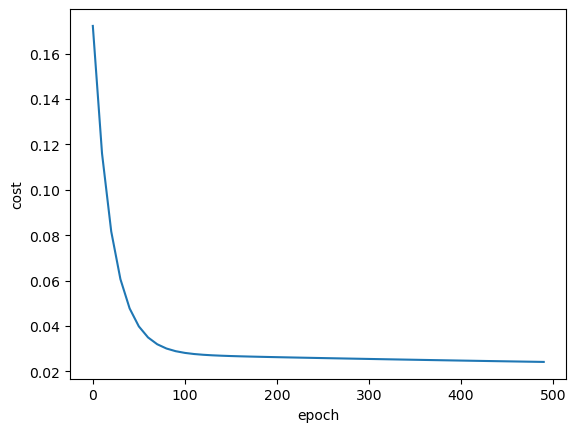

In [58]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)